In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-street-food-dataset/global_street_food.csv


# Data Loading and Preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/global-street-food-dataset/global_street_food.csv')

In [3]:
df.sample(10)

,Dish Name,Country,Region/City,Ingredients,Description,Cooking Method,Typical Price (USD),Vegetarian
3216,Kokoreç,Turkey,Izmir,"Lamb Intestines, Spices, Bread",Charred to perfection with a smoky flavor.,Grilled,2.89,No
3912,Quesadilla,Mexico,Puebla,"Tortilla, Cheese, Mushrooms",Charred to perfection with a smoky flavor.,Grilled,2.19,Yes
2270,Pani Puri,India,Delhi,"Semolina, Tamarind, Chickpeas, Spices",Put together fresh with a mix of flavors and t...,Assembled,0.36,Yes
2063,Gözleme,Turkey,Ankara,"Dough, Spinach, Cheese",Charred to perfection with a smoky flavor.,Grilled,4.32,Yes
2875,Taiyaki,Japan,Kyoto,"Flour, Red Bean Paste",Golden brown and fluffy with a soft interior.,Baked,1.26,Yes
2138,Simit,Turkey,Istanbul,"Flour, Sesame Seeds, Yeast",Golden brown and fluffy with a soft interior.,Baked,0.59,Yes
777,Gözleme,Turkey,Ankara,"Dough, Spinach, Cheese",Charred to perfection with a smoky flavor.,Grilled,3.74,Yes
1328,Takoyaki,Japan,Osaka,"Octopus, Flour Batter, Bonito Flakes, Green On...","Crispy and hot, often served with sauces or ch...",Fried,2.66,No
1264,Vada Pav,India,Mumbai,"Potato, Spices, Bread Bun, Chutney","Crispy and hot, often served with sauces or ch...",Fried,3.48,Yes
3488,Moo Ping,Thailand,Chiang Mai,"Pork, Garlic, Soy Sauce, Sugar",Charred to perfection with a smoky flavor.,Grilled,1.98,No


In [4]:
df['Dish Name'].value_counts()

Dish Name
Yakisoba              278
Taiyaki               271
Moo Ping              246
Roti Sai Mai          241
Pani Puri             239
Pad Thai              235
Gözleme               234
Takoyaki              233
Vada Pav              230
Quesadilla            225
Elote                 223
Simit                 222
Kathi Roll            213
Tacos al Pastor       212
Hot Dog               210
Funnel Cake           206
Philly Cheesesteak    205
Kokoreç               194
Shawarma               62
Bunny Chow             58
Koshari                57
Manakish               56
Suya                   51
Okonomiyaki            50
Falafel                49
Name: count, dtype: int64

In [5]:
df.isna().sum()

Dish Name              0
Country                0
Region/City            0
Ingredients            0
Description            0
Cooking Method         0
Typical Price (USD)    0
Vegetarian             0
dtype: int64

In [6]:
df = df.drop(columns=['Ingredients','Description'])

In [7]:
df

,Dish Name,Country,Region/City,Cooking Method,Typical Price (USD),Vegetarian
0,Takoyaki,Japan,Osaka,Fried,3.28,No
1,Vada Pav,India,Mumbai,Fried,2.37,Yes
2,Funnel Cake,USA,Texas,Fried,2.78,Yes
3,Kathi Roll,India,Kolkata,Grilled,1.89,No
4,Pad Thai,Thailand,Bangkok,Stir-Fried,3.48,Yes
...,...,...,...,...,...,...
4495,Koshari,Egypt,Cairo,Boiled,2.80,Yes
4496,Koshari,Egypt,Cairo,Boiled,2.80,Yes
4497,Koshari,Egypt,Cairo,Boiled,2.80,Yes
4498,Koshari,Egypt,Cairo,Boiled,2.80,Yes


# Vizualization Section

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set_style('whitegrid')

In [10]:
df.columns

Index(['Dish Name', 'Country', 'Region/City', 'Cooking Method',
       'Typical Price (USD)', 'Vegetarian'],
      dtype='object')

In [11]:
cols = ['Dish Name', 'Country', 'Region/City', 'Cooking Method', 'Vegetarian']

# Count Plot

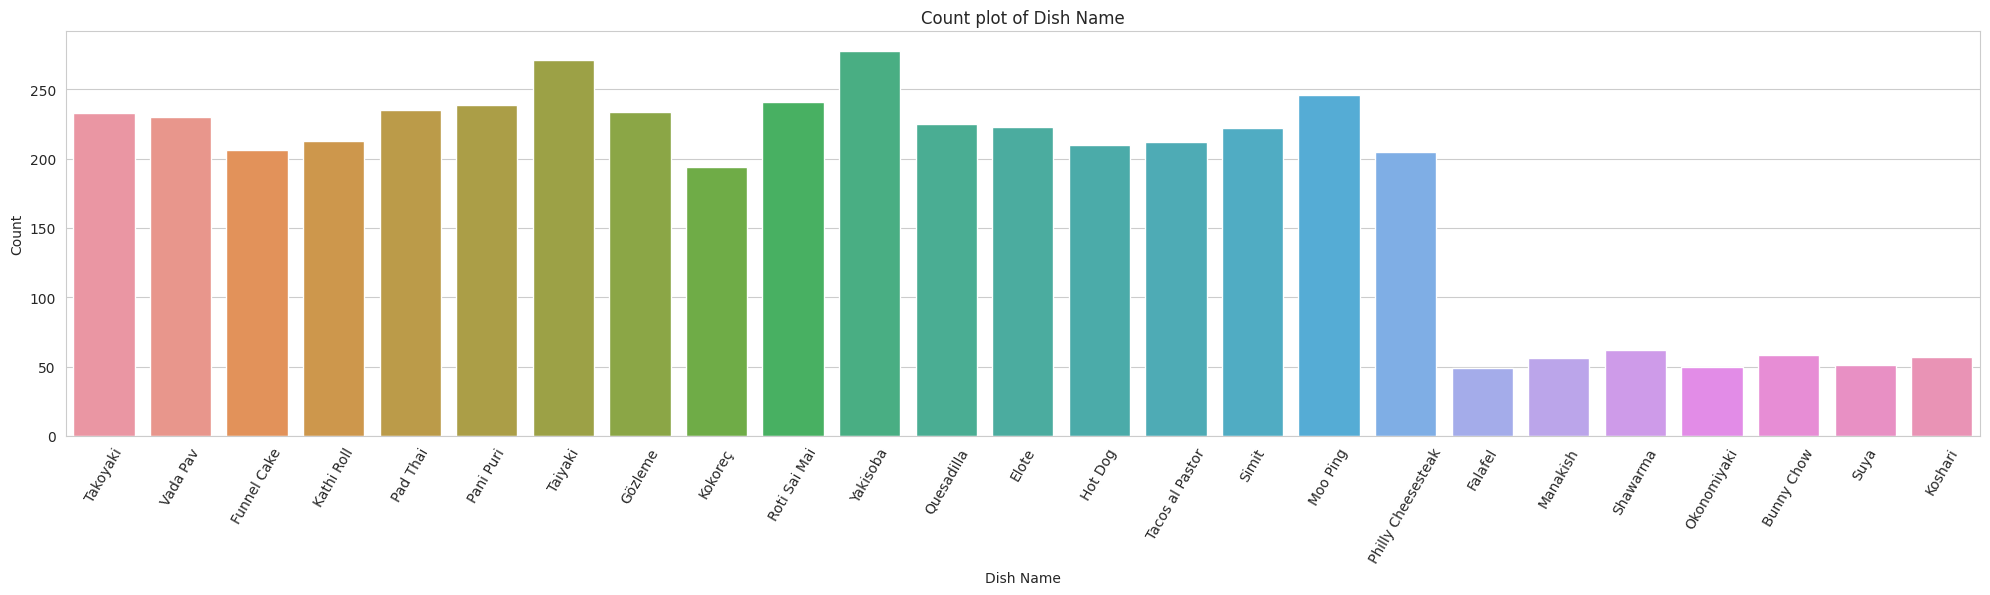

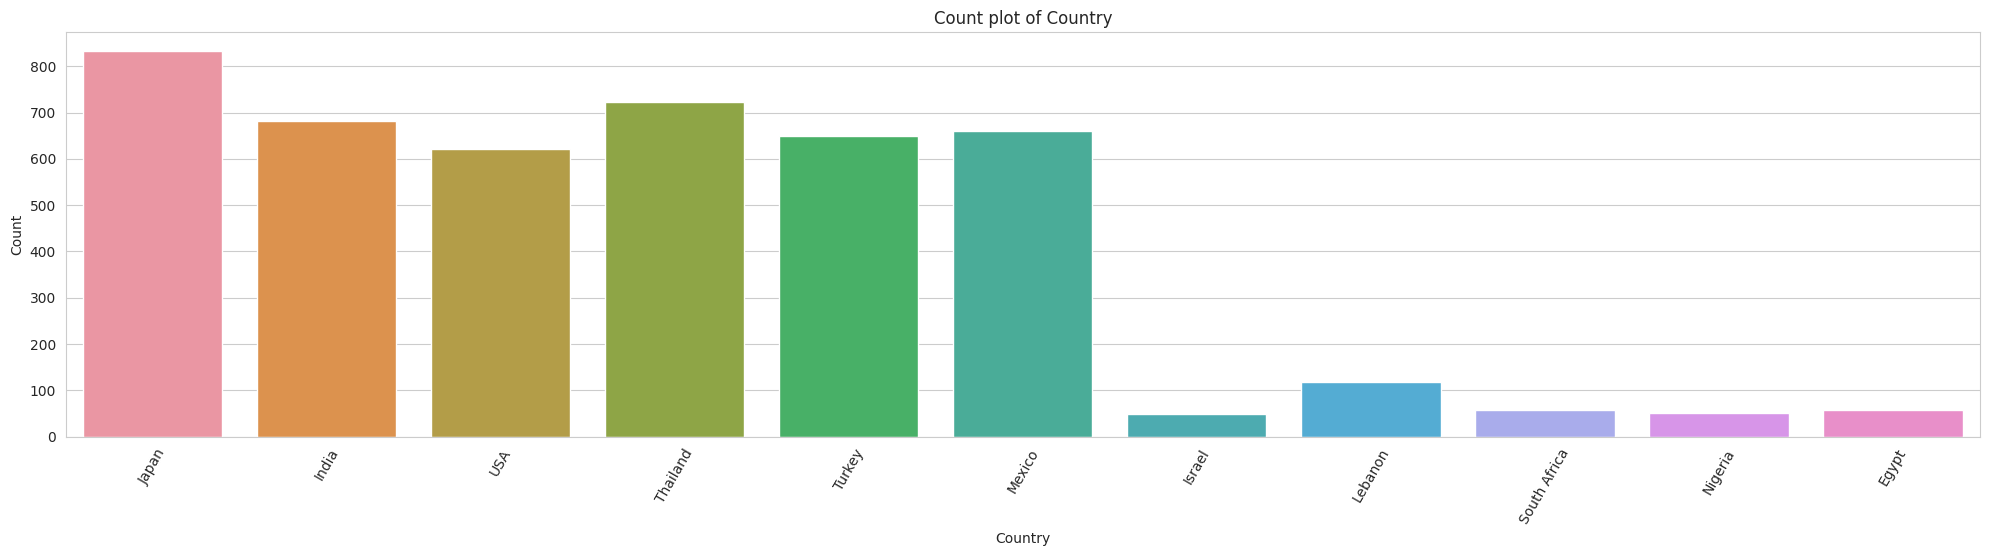

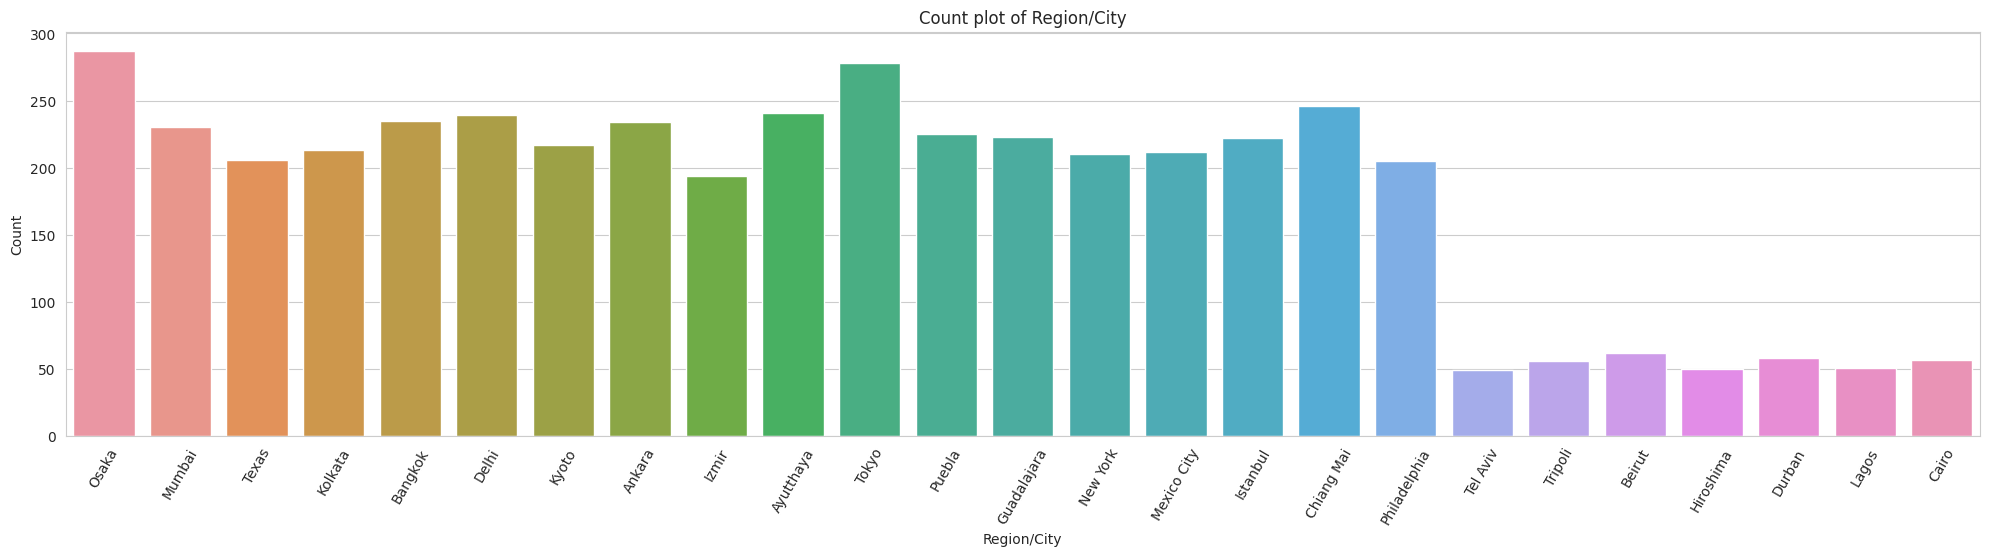

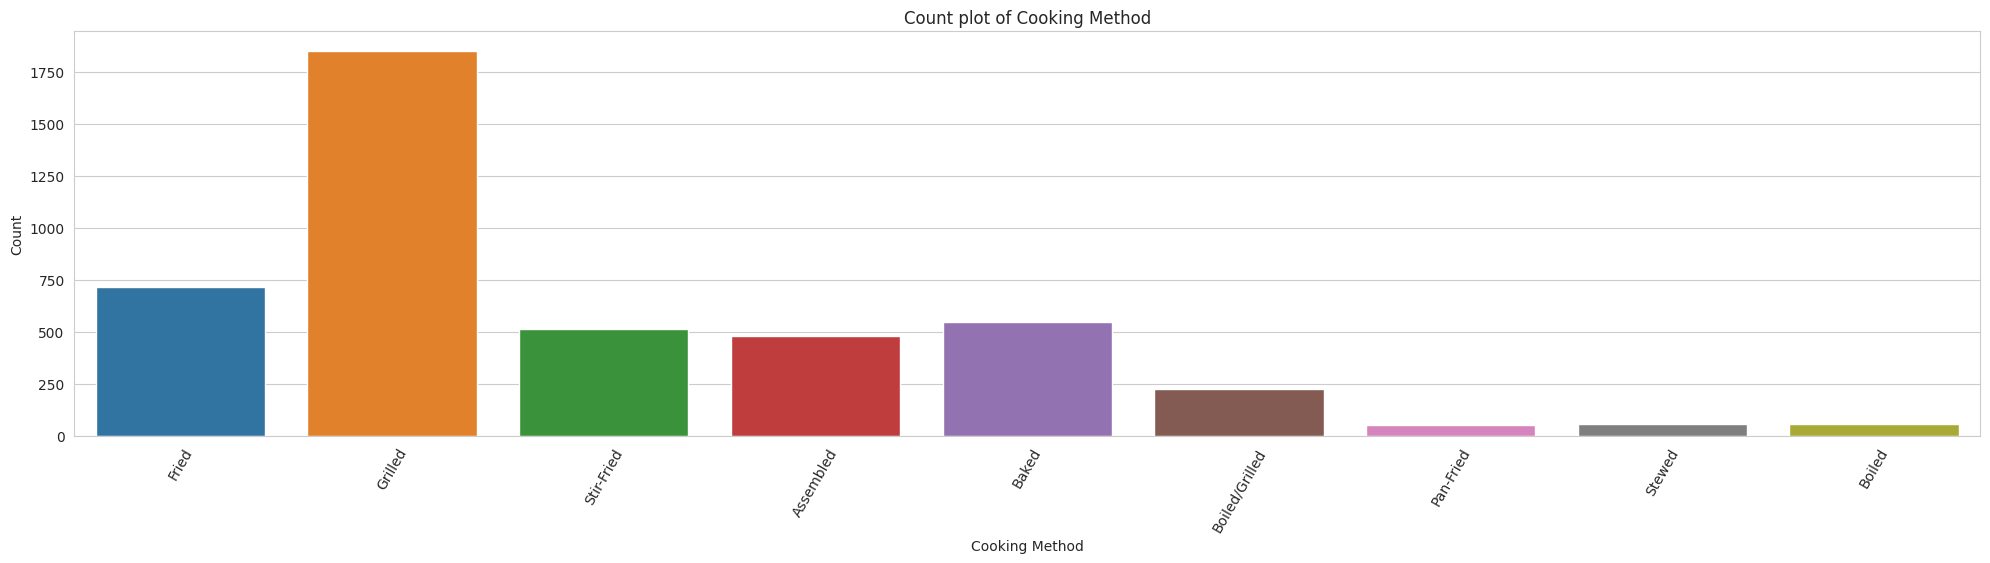

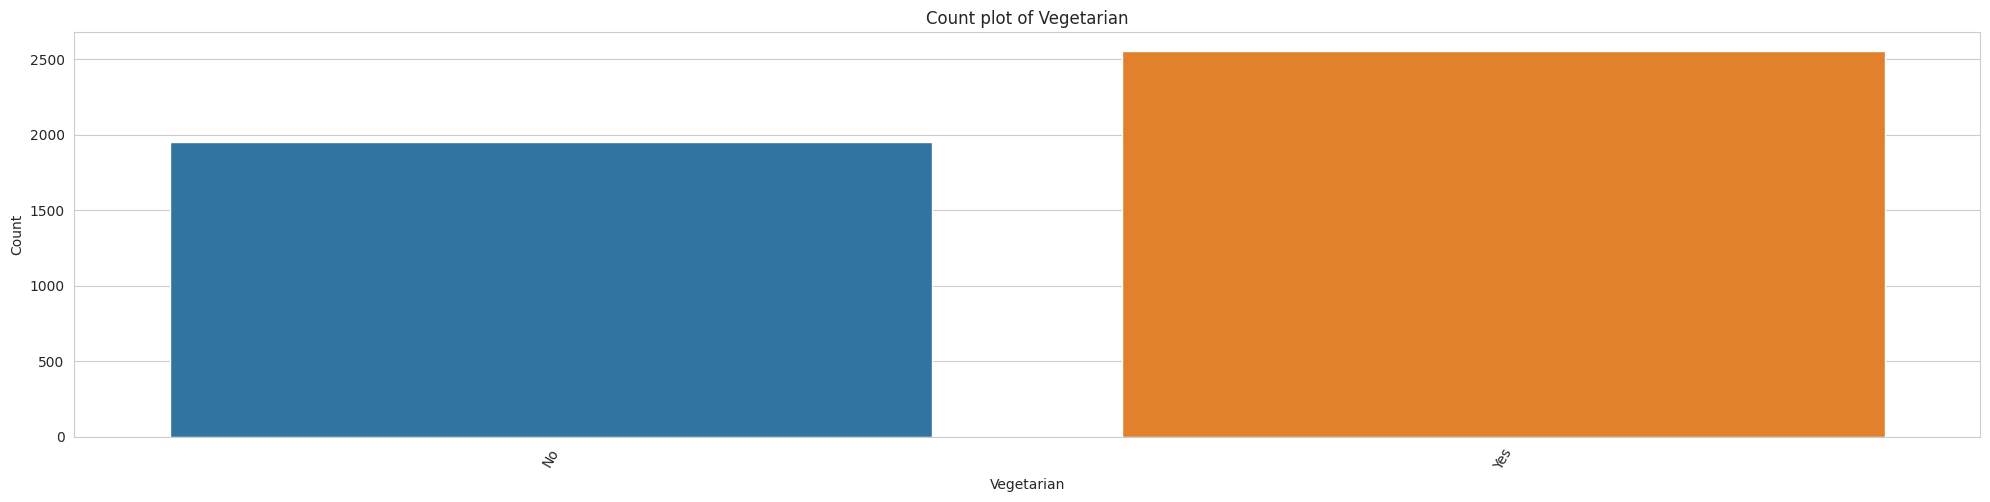

In [12]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,5))
        sns.countplot(x=features,data=df)
        plt.title(f"Count plot of {features}")
        plt.tight_layout()
        # plt.xlabel(features)
        plt.ylabel('Count')
        plt.xticks(rotation=60)
        plt.show()

# Combined Plots

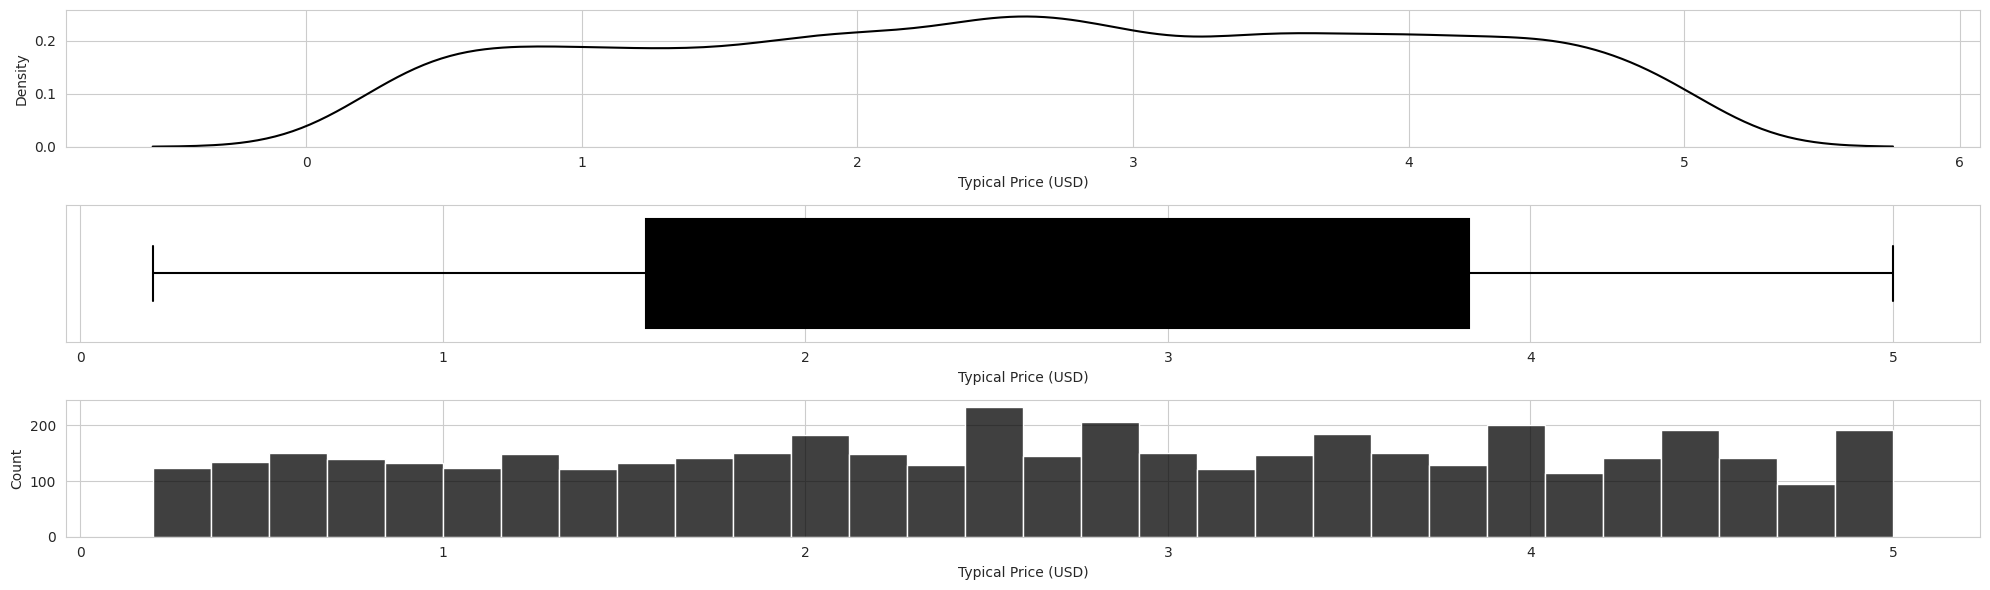

In [13]:
fig, axs = plt.subplots(nrows=3, figsize=(20, 6))
sns.kdeplot(x=df['Typical Price (USD)'], ax=axs[0],color='black')
sns.boxplot(x=df['Typical Price (USD)'], ax=axs[1],color='black')
sns.histplot(df['Typical Price (USD)'], bins=30, ax=axs[2],color='black')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dish Name            4500 non-null   object 
 1   Country              4500 non-null   object 
 2   Region/City          4500 non-null   object 
 3   Cooking Method       4500 non-null   object 
 4   Typical Price (USD)  4500 non-null   float64
 5   Vegetarian           4500 non-null   object 
dtypes: float64(1), object(5)
memory usage: 211.1+ KB


In [17]:
df

,Dish Name,Country,Region/City,Cooking Method,Typical Price (USD),Vegetarian
0,Takoyaki,Japan,Osaka,Fried,3.28,No
1,Vada Pav,India,Mumbai,Fried,2.37,Yes
2,Funnel Cake,USA,Texas,Fried,2.78,Yes
3,Kathi Roll,India,Kolkata,Grilled,1.89,No
4,Pad Thai,Thailand,Bangkok,Stir-Fried,3.48,Yes
...,...,...,...,...,...,...
4495,Koshari,Egypt,Cairo,Boiled,2.80,Yes
4496,Koshari,Egypt,Cairo,Boiled,2.80,Yes
4497,Koshari,Egypt,Cairo,Boiled,2.80,Yes
4498,Koshari,Egypt,Cairo,Boiled,2.80,Yes


In [18]:
lab_cols= ['Dish Name', 'Country', 'Region/City', 'Cooking Method', 'Vegetarian']

In [19]:
for column in lab_cols:
    df[column] = le.fit_transform(df[column])

In [20]:
df

,Dish Name,Country,Region/City,Cooking Method,Typical Price (USD),Vegetarian
0,22,3,18,4,3.28,0
1,23,1,16,4,2.37,1
2,3,10,22,4,2.78,1
3,6,1,12,5,1.89,0
4,12,8,2,8,3.48,1
...,...,...,...,...,...,...
4495,8,0,4,2,2.80,1
4496,8,0,4,2,2.80,1
4497,8,0,4,2,2.80,1
4498,8,0,4,2,2.80,1


# Model Section

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [22]:
df = df.drop(columns=['Typical Price (USD)','Vegetarian'])

In [23]:
X = df.iloc[:,:3]
y = df.iloc[:,-1]

In [24]:
X

,Dish Name,Country,Region/City
0,22,3,18
1,23,1,16
2,3,10,22
3,6,1,12
4,12,8,2
...,...,...,...
4495,8,0,4
4496,8,0,4
4497,8,0,4
4498,8,0,4


In [25]:
# scaler = MinMaxScaler()

In [26]:
# X = scaler.fit_transform(X_scale)

In [27]:
# X

In [28]:
y

0       4
1       4
2       4
3       5
4       8
       ..
4495    2
4496    2
4497    2
4498    2
4499    5
Name: Cooking Method, Length: 4500, dtype: int64

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
models = {
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "XGBClassifier": XGBClassifier(),
    "SVC": SVC(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
    
    
}

In [31]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test).round(0)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4)
    })

In [32]:
results_df = pd.DataFrame(results).sort_values(by="F1 Score",ascending =False)
print(results_df)

                        Model  Accuracy  Precision  Recall  F1 Score
3               XGBClassifier    1.0000     1.0000  1.0000    1.0000
5        KNeighborsClassifier    1.0000     1.0000  1.0000    1.0000
6      DecisionTreeClassifier    1.0000     1.0000  1.0000    1.0000
7  GradientBoostingClassifier    1.0000     1.0000  1.0000    1.0000
8      RandomForestClassifier    1.0000     1.0000  1.0000    1.0000
4                         SVC    0.9911     0.9916  0.9911    0.9911
9          AdaBoostClassifier    0.5767     0.3808  0.5767    0.4502
1                       Ridge    0.2933     0.3821  0.2933    0.2926
2                  ElasticNet    0.2489     0.2939  0.2489    0.2312
0                       Lasso    0.1956     0.2436  0.1956    0.1648


# CONCLUSION

> Some Model giving the 100% Results, ie. they are overfitting.